In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
torch.manual_seed(42)

## Load Model

In [3]:
MODELS_DIR = "../artifacts"
NEWEST_MODEL = max(os.listdir(MODELS_DIR))
MOBILE_MODEL = "mobile_model.pt"

PATH = os.path.join(MODELS_DIR, NEWEST_MODEL, MOBILE_MODEL)
PATH

'../artifacts/1631154078/mobile_model.pt'

In [4]:
m = torch.load(PATH)

/home/thomas/miniconda3/envs/torch-mobile-mnist/lib/python3.8/site-packages/torch/serialization.py:589: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


## Demonstrate 

In [5]:
import torchvision

In [6]:
mnist_mean, mnist_std = 0.1307, 0.3081
mnist_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((mnist_mean,), (mnist_std,))
])


ds = torchvision.datasets.MNIST(root='../data/mnist/', download=False, train=False, transform=mnist_transform)
loader = torch.utils.data.DataLoader(ds, batch_size=1)
loader_it = iter(loader)

In [7]:
example, label = next(loader_it)

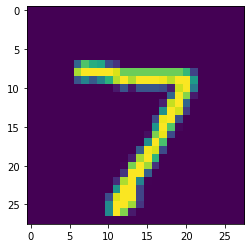

In [8]:
_ = plt.imshow(example.squeeze(1)[0])

In [9]:
comp_scores = m(example)
comp_scores

/home/thomas/miniconda3/envs/torch-mobile-mnist/lib/python3.8/site-packages/torch/nn/modules/module.py:727: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-ojg3q6e4/c10/core/TensorImpl.h:848.)
  result = self.forward(*input, **kwargs)


tensor([[-40.8890, -28.4490, -21.1053, -24.1011, -27.3835, -33.3996, -57.8113,
           0.0000, -32.8292, -21.7163]])

In [10]:
pred = torch.argmax(m(example))

pred.item(), label.item()

(7, 7)